# ICR - Identifying Age-Related Conditions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
SEED = 123

def get_dataset(set="train", drop_id=False):
    
    df = pd.read_csv(data_path + "train.csv")
    greeks = pd.read_csv(data_path + "greeks.csv")

    df = df.merge(greeks, on="Id", how="left")
    return df

df_train = get_dataset(set="train", drop_id=True)
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


### Class distribution

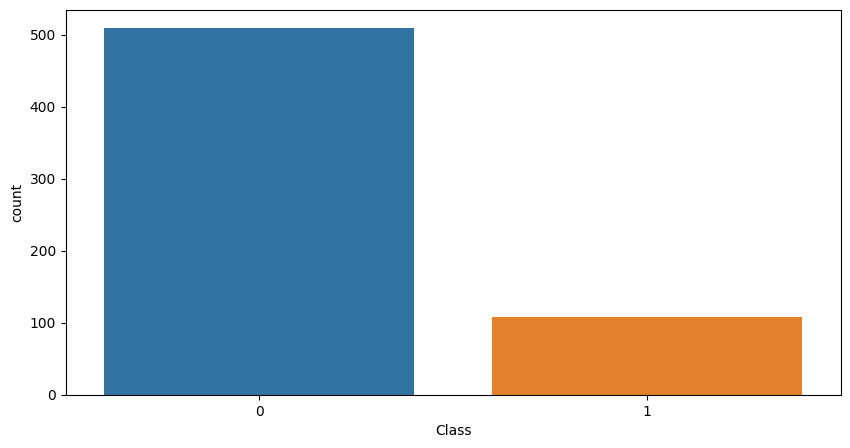

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Class', data=df_train, ax=ax)
plt.show()

## Non greek columns

In [3]:
greek_columns = ["Alpha", "Beta", "Gamma", "Delta", "Epsilon"]
non_greek_columns = .columns.difference(greek_columns + ["Id", "Class"])
len(non_greek_columns)

56

In [12]:
# df_train[non_greek_columns].info() to dataframe

info_df = pd.DataFrame(columns=['column_name', 'dtype', 'unique_values', 'null_values', 'null_percentage'])

for column in non_greek_columns:
    new_row_df = pd.DataFrame({'column_name': [column],
                              'dtype': [df_train[column].dtype],
                              'unique_values': [df_train[column].nunique()],
                              'null_values': [df_train[column].isnull().sum()],
                              'null_percentage': [df_train[column].isnull().sum() / df_train[column].shape[0]]})
    info_df = pd.concat([info_df, new_row_df])

info_df.sort_values(by='null_values', ascending=False)

,column_name,dtype,unique_values,null_values,null_percentage
0,EL,float64,311,60,0.097245
0,BQ,float64,515,60,0.097245
0,CC,float64,602,3,0.004862
0,CB,float64,553,2,0.003241
0,FS,float64,161,2,0.003241
0,GL,float64,355,1,0.001621
0,FL,float64,388,1,0.001621
0,DU,float64,253,1,0.001621
0,FC,float64,600,1,0.001621
0,FR,float64,435,0,0.000000


In [13]:
info_df['dtype'].value_counts()

dtype
float64    55
object      1
Name: count, dtype: int64

In [18]:
df_train['EJ'].value_counts()

EJ
B    395
A    222
Name: count, dtype: int64

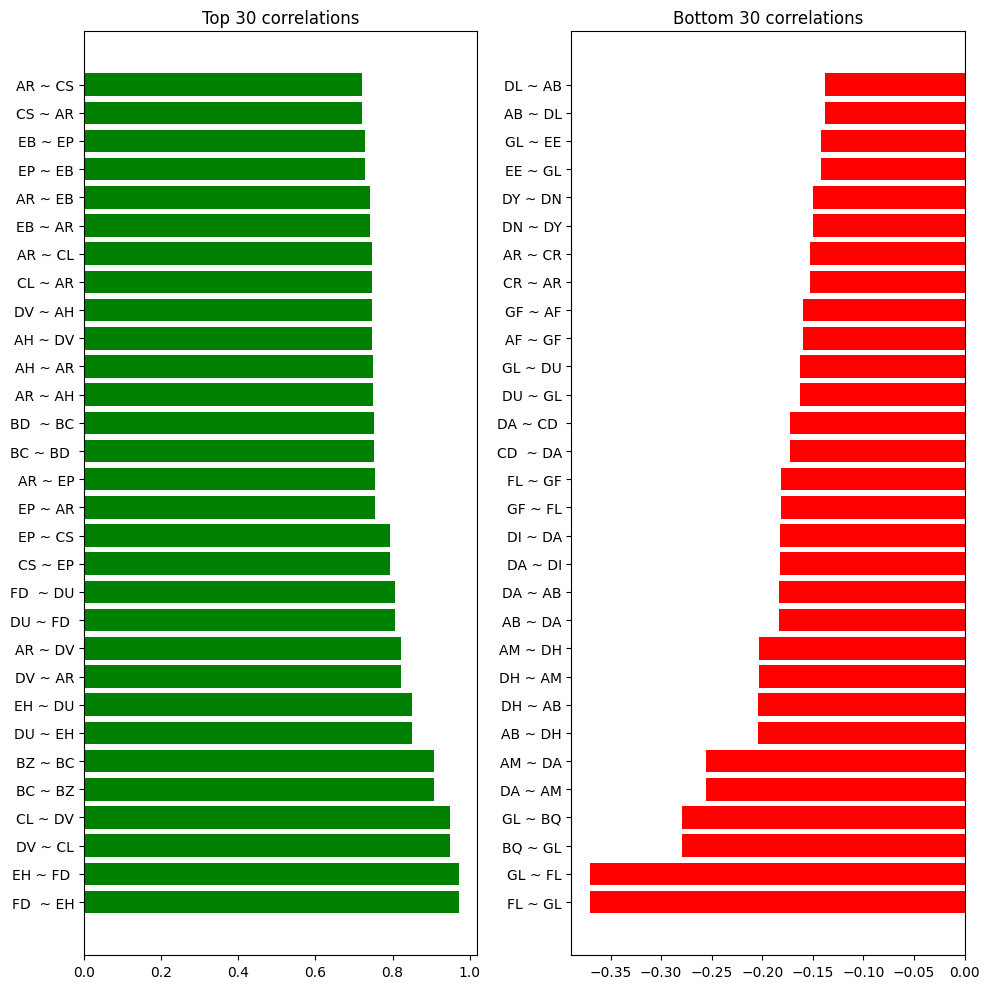

In [33]:
float_cols = list(set(non_greek_columns) - {'EJ'})

# get correlations

correlations = df_train[float_cols].corr()

# get from highest to lowest correlations
correlations = correlations.unstack().sort_values(ascending=False)
# remove 1.0 correlations
correlations = correlations[correlations != 1.0]

correlations = correlations.reset_index()
correlations.columns = ['feature1', 'feature2', 'correlation']
correlations['name'] = correlations['feature1'] + ' ~ ' + correlations['feature2']

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax = ax.flatten()

n = 30
# top 20 correlations

ax[0].barh(correlations['name'].head(n), correlations['correlation'].head(n), color='green')
ax[0].set_title(f'Top {n} correlations')

# bottom 20 correlations

correlations = correlations.sort_values(by='correlation', ascending=True)
ax[1].barh(correlations['name'].head(n), correlations['correlation'].head(n), color='red')
ax[1].set_title(f'Bottom {n} correlations')

plt.tight_layout()
plt.show()


In [35]:
df_train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,8095.932828,24.640462,69.191944,21.978000,0,A,B,M,B,9/13/2020
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,3085.308063,29.648928,124.808872,0.145340,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,6474.652866,26.166072,119.559420,21.978000,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,1965.343176,25.116750,37.155112,0.184622,0,A,C,M,B,1/31/2019


### Greeks

In [50]:
greek_df = df_train[greek_columns + ["Class"]]

greek_df['greek_concat'] = greek_df[['Alpha','Beta','Gamma','Delta']].apply(lambda x: ''.join(x), axis=1)

greek_df[['greek_concat','Class']].value_counts()

C:\Users\Wiktor\AppData\Local\Temp\ipykernel_21736\217783960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_df['greek_concat'] = greek_df[['Alpha','Beta','Gamma','Delta']].apply(lambda x: ''.join(x), axis=1)


greek_concat  Class
ACMB          0        242
ABMB          0         97
ACNB          0         63
ABMA          0         51
ACMC          0         44
BBHB          1         20
BCHC          1         12
ACMD          0         11
BBHA          1         10
DBFB          1          8
GBBB          1          7
GCBB          1          6
BCGD          1          6
GCAB          1          5
BCHD          1          5
DBEA          1          4
BCHB          1          4
GAAA          1          3
GCBC          1          3
DBEB          1          2
DCEC          1          2
GABA          1          2
GBAB          1          2
BCGC          1          2
BAHA          1          2
DAFA          1          1
DBFA          1          1
GCAC          1          1
ACNA          0          1
Name: count, dtype: int64

In [53]:
cols = ['Alpha', 'Beta','Gamma','Delta']
lens = [ len(greek_df[col].unique()) for col in cols ]
lens

[4, 3, 8, 4]

In [54]:
res = 1
for el in lens:
    res *= el
print(f"There should be {res} possible combinations of available greeks") 

There should be 384 possible combinations of available greeks


In [51]:
len(greek_df['greek_concat'].unique())

29

observation: not all combinations are present

In [56]:
len(greek_df[ greek_df['Class'] == 0]['greek_concat'].unique())

7

In [57]:
len(greek_df[ greek_df['Class'] == 1]['greek_concat'].unique())

22

In [58]:
greeks_class_0 = greek_df[ greek_df['Class'] == 0]['greek_concat'].unique()
greeks_class_1 = greek_df[ greek_df['Class'] == 1]['greek_concat'].unique()

print("Class 0: ", greeks_class_0)
print("Class 1: ", greeks_class_1)

Class 0:  ['ACMB' 'ABMB' 'ACNB' 'ACMC' 'ABMA' 'ACMD' 'ACNA']
Class 1:  ['BCGD' 'DBFB' 'DBEB' 'DBEA' 'BBHB' 'BBHA' 'GBAB' 'GCBB' 'BAHA' 'GCAB'
 'BCGC' 'GCBC' 'BCHC' 'GAAA' 'DAFA' 'BCHB' 'DCEC' 'GABA' 'GBBB' 'BCHD'
 'DBFA' 'GCAC']


it may be a useful feature

### Feature interactions?